In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Treemap

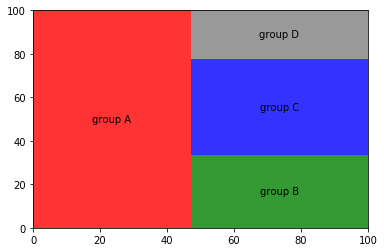

In [ ]:
import squarify

df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

squarify.plot(sizes=df['nb_people'], label=df['group'], color=["red","green","blue", "grey"], alpha=.8 ) # color:색상 설정

# 누적막대그래프

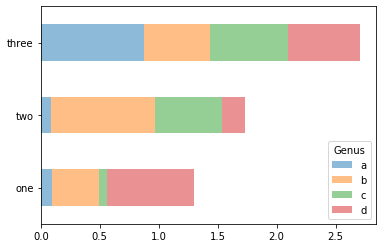

In [ ]:
df = pd.DataFrame(np.random.rand(3,4),
                 index=['one', 'two','three'],
                 columns=pd.Index(['a', 'b', 'c', 'd'], name='Genus'))

df.plot.barh(stacked=True, alpha=0.5)

# Pie chart

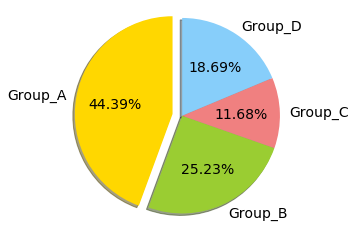

In [ ]:
group_names = ['Group_A', 'Group_B', 'Group_C', 'Group_D']
group_sizes = [95, 54, 25, 40]
group_colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
group_explodes = (0.1, 0, 0, 0)

plt.pie(group_sizes, explode=group_explodes, labels=group_names, colors=group_colors, autopct='%1.2f%%', 
        shadow=True, startangle=90, textprops={'fontsize': 14})
plt.axis('equal')
plt.show()

# 도넛 그래프

In [ ]:
subgroup_names = ['A_1', 'A_2', 'A_3', 'A_4', 'B_1', 'B_2', 'B_3', 'C_1', 'C_2']
subgroup_sizes = [50, 30, 10, 5, 30, 20, 4, 20, 5]

a, b, c = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues] # 색상
width_num = 0.4 # 넓이

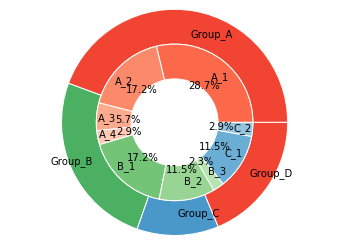

In [ ]:
fig, ax = plt.subplots()
ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes, radius=1.3, labels=group_names, labeldistance=0.8, colors=[a(0.6), b(0.6), c(0.6)])
plt.setp(pie_outside, width=width_num, edgecolor='white')

pie_inside, plt_labels, junk = \
    ax.pie(subgroup_sizes, radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, autopct='%1.1f%%', 
           colors=[a(0.5), a(0.4), a(0.3), a(0.2), b(0.5), b(0.4), b(0.3), c(0.5), c(0.4)])
plt.setp(pie_inside, width=width_num, edgecolor='white')
plt.show()

# Directed Graph

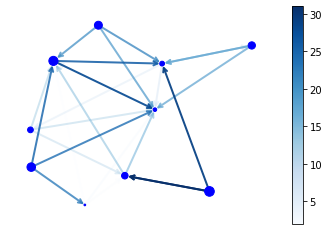

In [ ]:
import matplotlib as mpl
import networkx as nx

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)

for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

# 지도 시각화
## 1)

In [ ]:
import folium

m = folium.Map(location=[37.5502, 126.982], zoom_start=12)
folium.Marker(location=[37.5502, 126.982], popup="Marker A",
             icon=folium.Icon(icon='cloud')).add_to(m)
folium.Marker(location=[37.5411, 127.0107], popup="한남동",
             icon=folium.Icon(color='red')).add_to(m)
m

## 2)

In [ ]:
import platform

import matplotlib.font_manager as fm
font_path = fm.FontProperties(fname='NotoSansCJKkr-Bold.otf')

In [ ]:
data_draw_korea = pd.read_csv('data_draw_korea.csv', index_col=0, encoding='UTF-8')
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [ ]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

gamma = 0.75

blockedMap = data_draw_korea
targetData = '인구수'

whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

datalabel = targetData

vmin = min(blockedMap[targetData])
vmax = max(blockedMap[targetData])

mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

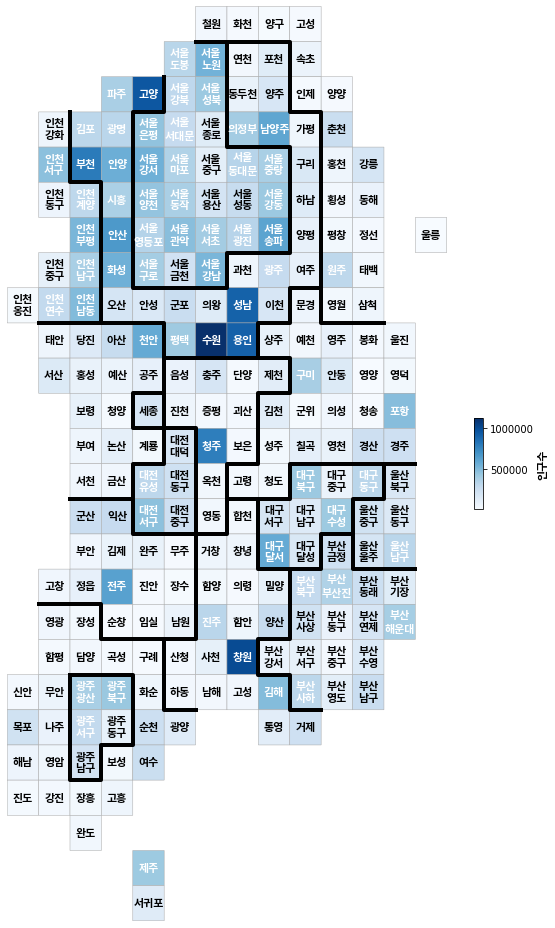

In [ ]:
cmapname = 'Blues' #'Reds'

plt.figure(figsize=(8, 13))
plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

# 지역 이름 표시
for idx, row in blockedMap.iterrows():
    annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
    if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
        dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
        if len(row['행정구역']) <= 2:
            dispname += row['행정구역'][-1]
    else:
        dispname = row['행정구역'][:-1]

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', color=annocolor,
                 linespacing=linespacing, fontproperties = font_path)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=4)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')
    
cb = plt.colorbar(shrink=.1, aspect=10)
cb.set_label(datalabel, fontproperties = font_path)

plt.tight_layout()
plt.show()